In [1]:
import numpy as np
import pandas as pd

In [2]:
# Example from https://hvplot.holoviz.org/user_guide/Introduction.html
index = pd.date_range('1/1/2000', periods=1000)
df = pd.DataFrame(np.random.randn(1000, 4), index=index, columns=list('ABCD')).cumsum()

df.head()

,A,B,C,D
2000-01-01,-1.912966,1.375673,-0.489251,0.686866
2000-01-02,-3.386886,1.993539,-0.220366,1.175154
2000-01-03,-3.854148,3.133619,0.199520,1.052502
2000-01-04,-3.262739,2.193257,0.359143,1.150498
2000-01-05,-4.270882,2.816196,1.349938,2.334721


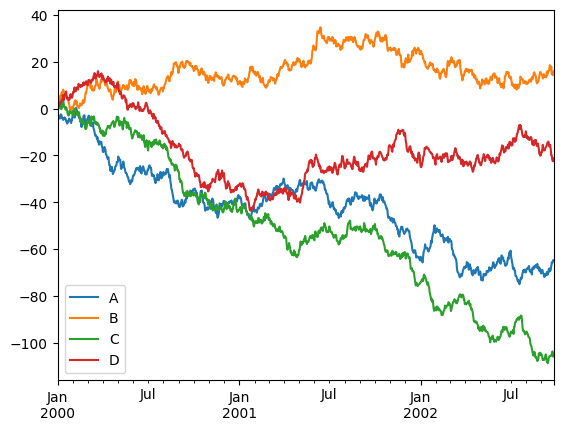

In [3]:
%matplotlib inline

df.plot();

In [4]:
import hvplot.pandas  # noqa

pd.options.plotting.backend = 'holoviews'

In [5]:
df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [6]:
from hvplot import hvPlot
hvplot.extension('bokeh')
import colorcet as cc

In [7]:
plot = hvPlot(df)

In [8]:
plot(y=['A', 'B', 'C', 'D'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [9]:
# 2 plots from the same source:
plot(y=['A','B','C']) + plot(y=['C','D','A'])

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [index]   (value)

In [10]:
# Note that A and C have different colors in the left and right figures.

In [11]:
# df is in so-called "wide" format. Each variable A, B, C, and D has its own column.
# A row in the wide format contains observations for more than one variable.
# In contrast, the "long" format contains one observation per row. To distinguish
# variables, each row has one or more columns that defines the variable.
# hvplot can also plot DataFrames in the "long" format.

# let's create a long format from df:
df2 = df.copy()
df2 = df2.reset_index()
df2 = pd.melt(df2, id_vars='index', value_vars=['A','B','C', 'D'], var_name='ABCD')
df2

,index,ABCD,value
0,2000-01-01,A,-1.912966
1,2000-01-02,A,-3.386886
2,2000-01-03,A,-3.854148
3,2000-01-04,A,-3.262739
4,2000-01-05,A,-4.270882
...,...,...,...
3995,2002-09-22,D,-19.983942
3996,2002-09-23,D,-21.865525
3997,2002-09-24,D,-22.462608
3998,2002-09-25,D,-22.432267


In [12]:
plot2 = df2.hvplot(y='value', by='ABCD')

In [13]:
# 2 plots from the same source:
# The .select() function picks the plot-variables to display.
plot2.select(ABCD=list('ABC')) + plot2.select(ABCD=list('CDA'))

:Layout
   .NdOverlay.I  :NdOverlay   [ABCD]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [ABCD]
      :Curve   [index]   (value)

In [14]:
# Note that the variable order in the legend to the right is different from the variable order in the corresponding select() call.

In [15]:
# and the C variable has different colors in the left and right figures.

In [16]:
# To force the same variable (from a specific DataFrame), you can assign 
# a specific color to the curve for each variable.
# plot2 contains the curves for all variables in df2.
# cc.b_glasbey_bw_minc_20 contains 20 distinct colors.
# the curve color can be set by the opts function: 
for p, c in zip(plot2, cc.b_glasbey_bw_minc_20):
    p.opts(color=c)

In [17]:
plot2 # this results in different colors

:NdOverlay   [ABCD]
   :Curve   [index]   (value)

In [18]:
# but always the same color for the same variable:
plot2.select(ABCD=['A','C']) + plot2.select(ABCD=list('ACB'))

:Layout
   .NdOverlay.I  :NdOverlay   [ABCD]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [ABCD]
      :Curve   [index]   (value)

In [19]:
# Let's draw 2 figures with plots from different DataFrames.
# First create a new DataFrame
df3 = df2.copy()
df3['value'] = df3['value'] * -1.50
df3

,index,ABCD,value
0,2000-01-01,A,2.869449
1,2000-01-02,A,5.080330
2,2000-01-03,A,5.781222
3,2000-01-04,A,4.894109
4,2000-01-05,A,6.406323
...,...,...,...
3995,2002-09-22,D,29.975912
3996,2002-09-23,D,32.798288
3997,2002-09-24,D,33.693912
3998,2002-09-25,D,33.648400


In [20]:
# as before, creeate a plot of the whole DataFrame
# which will contain a curve for each variable.
# and we assign the same colors to the curves as for plot2
plot3 = df3.hvplot(y='value', by='ABCD')
for p, c in zip(plot3, cc.b_glasbey_bw_minc_20):
    p.opts(color=c)

In [21]:
plot3

:NdOverlay   [ABCD]
   :Curve   [index]   (value)

In [22]:
# Draw plot2 and plot3 on top of each other
# do not show the x-axis for plot2
# hide the legend for plot3 (use plot2's legend to select/deselect curves in plot3).
p = (plot2.opts(xaxis=False) + plot3.select(variable=list('ACD')).opts(show_legend=False)).cols(1)
p

:Layout
   .NdOverlay.I  :NdOverlay   [ABCD]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [ABCD]
      :Curve   [index]   (value)